# ASSIGNMENT 26

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords

import string 
from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
resume = pd.read_csv("Resume Data.csv", encoding='latin1')

In [3]:
resume

,Category,Resume
0,NaN,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."
...,...,...
957,Testing,Computer Skills: â?¢ Proficient in MS office (...
958,Testing,â? Willingness to accept the challenges. â? ...
959,Testing,"PERSONAL SKILLS â?¢ Quick learner, â?¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
resume.head()

,Category,Resume
0,NaN,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


In [5]:
resume['clean']=''
resume.head()

,Category,Resume,clean
0,NaN,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


In [6]:
print("Resume Categories")
print(resume['Category'].value_counts())

Resume Categories
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Mechanical Engineer          40
Sales                        40
Operations Manager           40
Data Science                 39
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


<Axes: xlabel='Category', ylabel='count'>

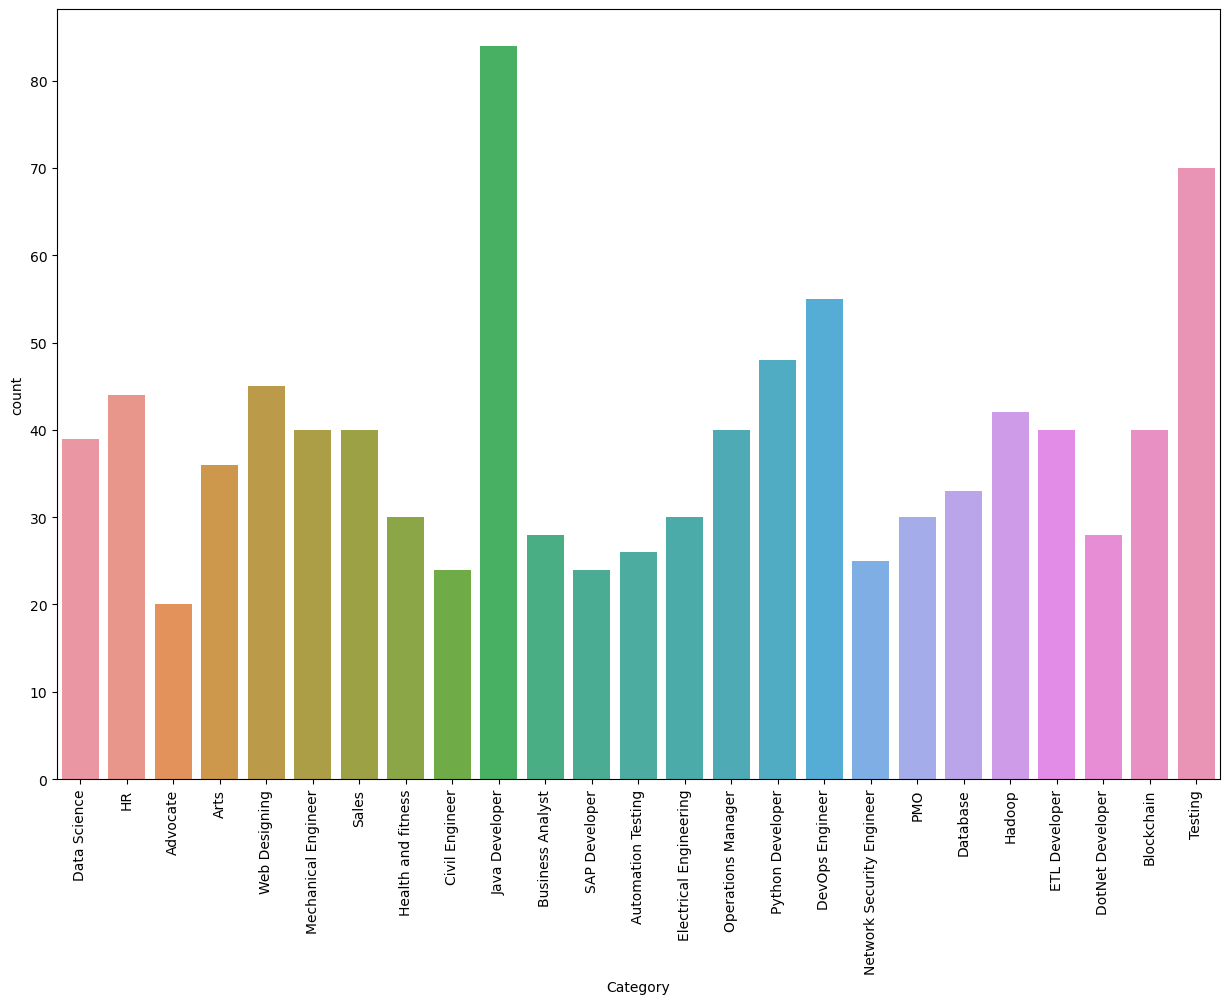

In [7]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x="Category",data=resume)

In [8]:
resume['Resume'][200]

"Education Details \nMay 1999 to September 2002 Diploma Mechanical Engg Mumbai, Maharashtra Institute of Mechanical Engg\nMay 1998 to May 1999 Diploma Mechanical Engg. Services  ITES\nMay 1993 to May 1995   Mumbai, Maharashtra Industrial Training Institute\nSr. Executive-Mechanical Engineering- Automation & Projects Consultant \n\nSr. Executive-Mechanical Engineering- Automation & Projects Consultant - Mechanical Engineering\nSkill Details \nMicrosoft Office -Word ,Excel,Auto cad,Micro station J ERP 3d Modeling software- Exprience - 120 monthsCompany Details \ncompany - Mechanical Engineering\ndescription - Role & Responsibilities: - Application Engineering / Pre Sales & Inside Sales â?¢ Provide applications support to inside sales personnel and outside sales channels, Provide product selection and materials of construction technical recommendations.\nâ?¢ Participate in the necessary training activities to establish technical competency & also Participate in Field Service trips as dire

In [9]:
print(resume['Resume'][800])

TechnicalProficiencies DB: Oracle 11g Domains: Investment Banking, Advertising, Insurance. Programming Skills: SQL, PLSQL BI Tools: Informatica 9.1 OS: Windows, Unix Professional Development Trainings â?¢ Concepts in Data Warehousing, Business Intelligence, ETL. â?¢ BI Tools -Informatica 9X Education Details 
 BCA  Nanded, Maharashtra Nanded University
ETL Developer 

ETL Developer - Sun Trust Bank NY
Skill Details 
ETL- Exprience - 39 months
EXTRACT, TRANSFORM, AND LOAD- Exprience - 39 months
INFORMATICA- Exprience - 39 months
ORACLE- Exprience - 39 months
UNIX- Exprience - 39 monthsCompany Details 
company - Sun Trust Bank NY
description - Sun Trust Bank, NY JAN 2018 to present
Client: Sun Trust Bank NY
Environment: Informatica Power Center 9.1, Oracle 11g, unix.

Role: ETL Developer

Project Profile:
Sun Trust Bank is a US based multinational financial services holding company, headquarters in NY that operates the Bank in New York and other financial services investments. The compan

In [10]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*',' ',resumeText)
    resumeText = re.sub('RT|cc',' ',resumeText)
    resumeText = re.sub('#\S+',' ',resumeText)
    resumeText = re.sub('[%s]'% re.escape("""""!"#%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+',' ',resumeText)
    return resumeText
resume['clean']=resume.Resume.apply(lambda x: cleanResume(x))

In [11]:
resume.head()

,Category,Resume,clean
0,NaN,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...


In [12]:
len(resume)

962

In [13]:
cor=" "

for i in range(0,962):
    cor=cor+resume["clean"][i]

In [14]:
cor[1000:2500]

'review process and run analytics and generate reports Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain this tool implements predictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyers review Understand the end to end flow of the solution doing research and development for classification models predictive analysis and mining of the information present in text data Worked on analyzing the outputs and precision monitoring for the entire tool TAR assists in predictive coding topic modelling from the evidence by following EY standards Developed the classifier models in order to identify red flags and fraud related issues Tools Technologies Python scikit learn tfidf word2vec doc2vec cosine similarity Na ve Bayes LDA NMF for topic modelling Vader and text blob for sentiment analysis Matplot lib Tableau dashboard for reporting MULTIPLE DATA SCIENCE AND ANAL

In [15]:
resume['clean'][200]

'Education Details May 1999 to September 2002 Diploma Mechanical Engg Mumbai Maharashtra Institute of Mechanical Engg May 1998 to May 1999 Diploma Mechanical Engg Services ITES May 1993 to May 1995 Mumbai Maharashtra Industrial Training Institute Sr Executive Mechanical Engineering Automation Projects Consultant Sr Executive Mechanical Engineering Automation Projects Consultant Mechanical Engineering Skill Details Microsoft Office Word Excel Auto cad Micro station J ERP 3d Modeling software Exprience 120 monthsCompany Details company Mechanical Engineering description Role Responsibilities Application Engineering Pre Sales Inside Sales Provide applications support to inside sales personnel and outside sales channels Provide product selection and materials of construction technical recommendations Participate in the necessary training activities to establish technical competency also Participate in Field Service trips as directed by Top Mgmt Assist Brand Managers and or Product Managers

In [16]:
token=nltk.tokenize.RegexpTokenizer('\w+')

tok=token.tokenize(cor)

len(tok)

411921

In [17]:
words=[]

for word in tok:
    words.append(word.lower())

In [18]:
stopwords = nltk.corpus.stopwords.words('english')

words_new = []

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words:
    if word not in stopwords:
        words_new.append(word)

In [19]:
len(words_new)

318313

# Lemmatization

In [20]:
#nltk.download('wordnet')

In [21]:
from nltk.corpus import brown

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\hitesh
[nltk_data]     sonar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
import nltk

In [24]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\hitesh
[nltk_data]     sonar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
nltk.data.path.append("")

In [26]:
from nltk.stem import WordNetLemmatizer 
  
wn = WordNetLemmatizer() 

lem_words=[]

for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)
    

In [27]:
len(lem_words)

318313

In [28]:
same=0
diff=0

for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
        
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 294
Number of words not Lemmatized= 1538


In [29]:
freq = nltk.FreqDist(lem_words)

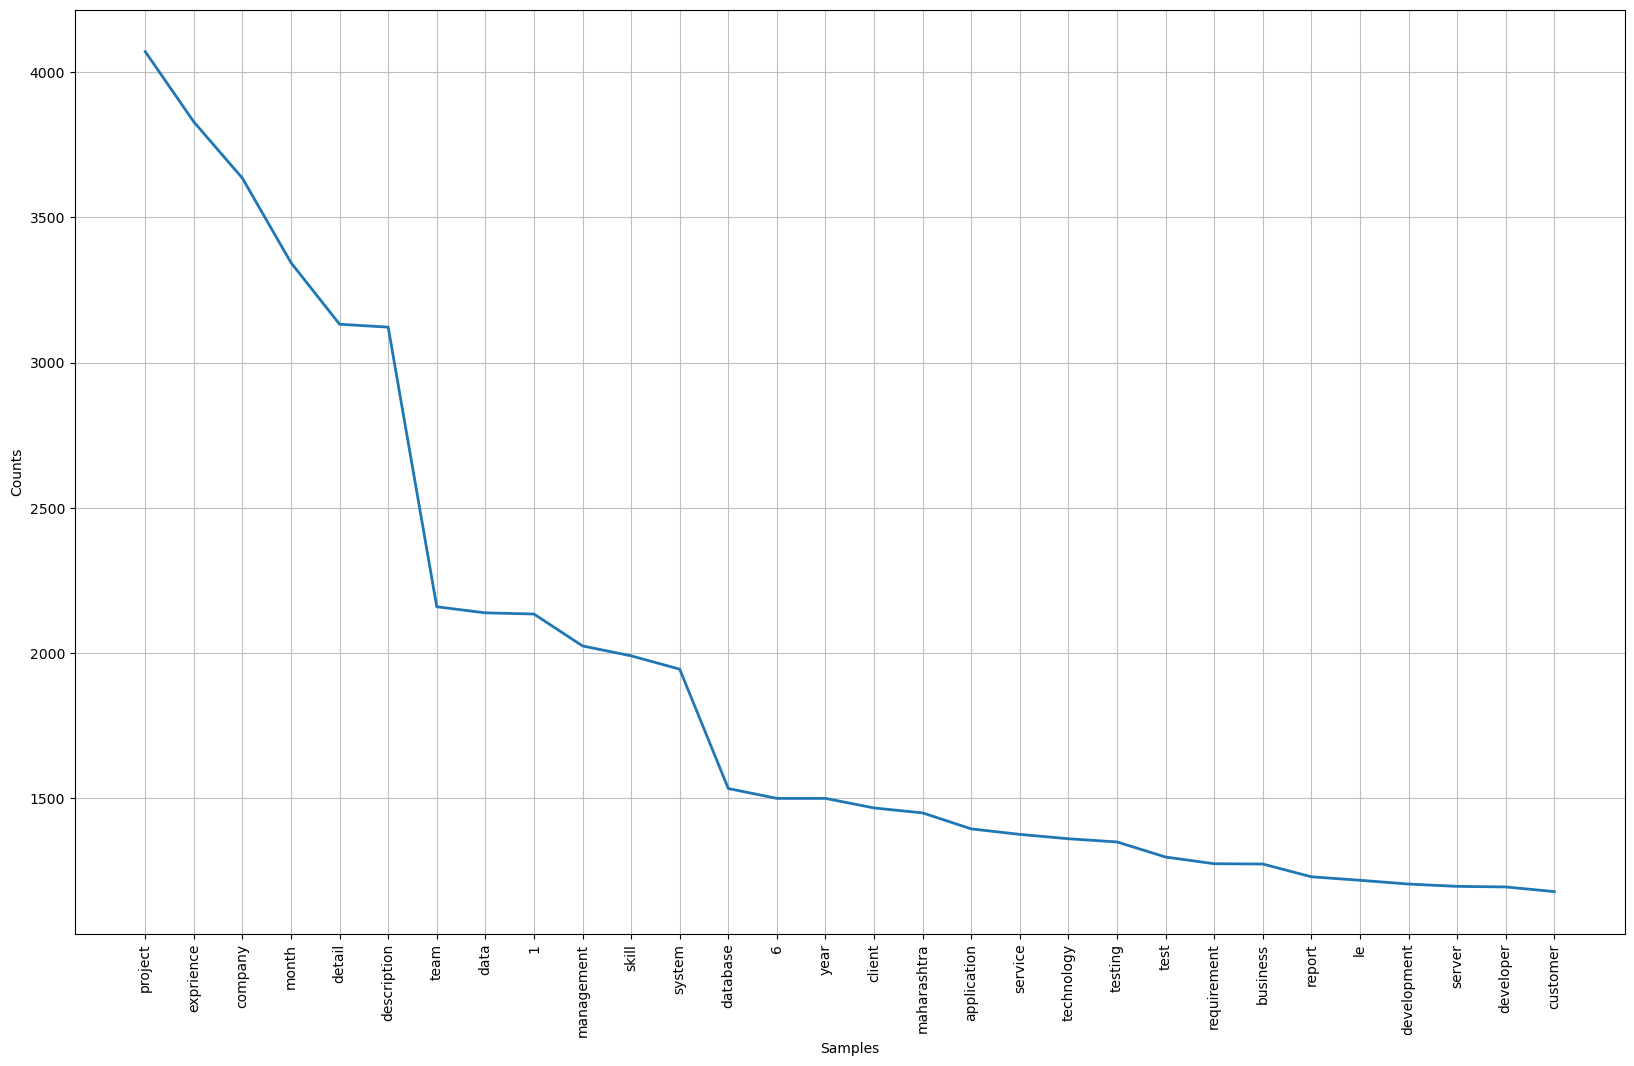

<Axes: xlabel='Samples', ylabel='Counts'>

In [30]:
plt.subplots(figsize=(20,12))
freq.plot(30)

In [31]:
len(freq)

6770

In [32]:
common = freq.most_common(50)

In [33]:
common

[('project', 4071),
 ('exprience', 3829),
 ('company', 3635),
 ('month', 3344),
 ('detail', 3132),
 ('description', 3122),
 ('team', 2159),
 ('data', 2138),
 ('1', 2134),
 ('management', 2024),
 ('skill', 1990),
 ('system', 1944),
 ('database', 1533),
 ('6', 1499),
 ('year', 1499),
 ('client', 1466),
 ('maharashtra', 1449),
 ('application', 1394),
 ('service', 1375),
 ('technology', 1360),
 ('testing', 1349),
 ('test', 1297),
 ('requirement', 1274),
 ('business', 1273),
 ('report', 1229),
 ('le', 1217),
 ('development', 1204),
 ('server', 1196),
 ('developer', 1194),
 ('customer', 1178),
 ('ltd', 1177),
 ('process', 1163),
 ('responsibility', 1137),
 ('using', 1124),
 ('sql', 1120),
 ('january', 1090),
 ('java', 1076),
 ('engineering', 1055),
 ('work', 1038),
 ('pune', 1026),
 ('role', 969),
 ('c', 951),
 ('user', 916),
 ('operation', 895),
 ('software', 886),
 ('pvt', 879),
 ('sale', 845),
 ('activity', 832),
 ('environment', 800),
 ('design', 786)]

In [34]:
# worldColud

In [35]:
res=' '.join([i for i in lem_words if not i.isdigit()])

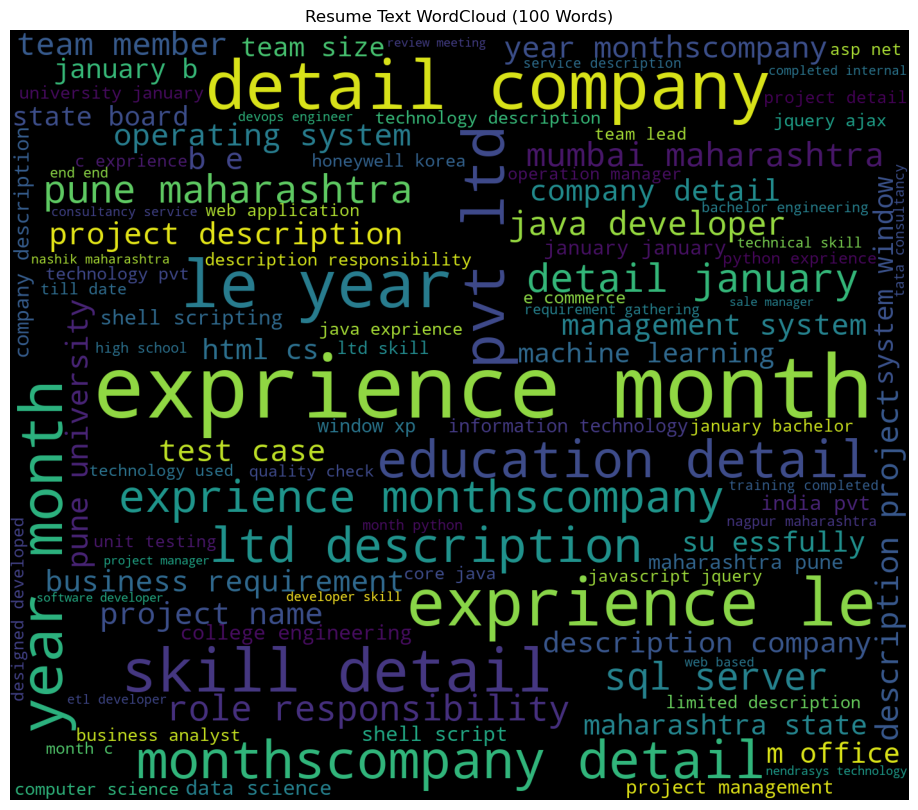

In [36]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()

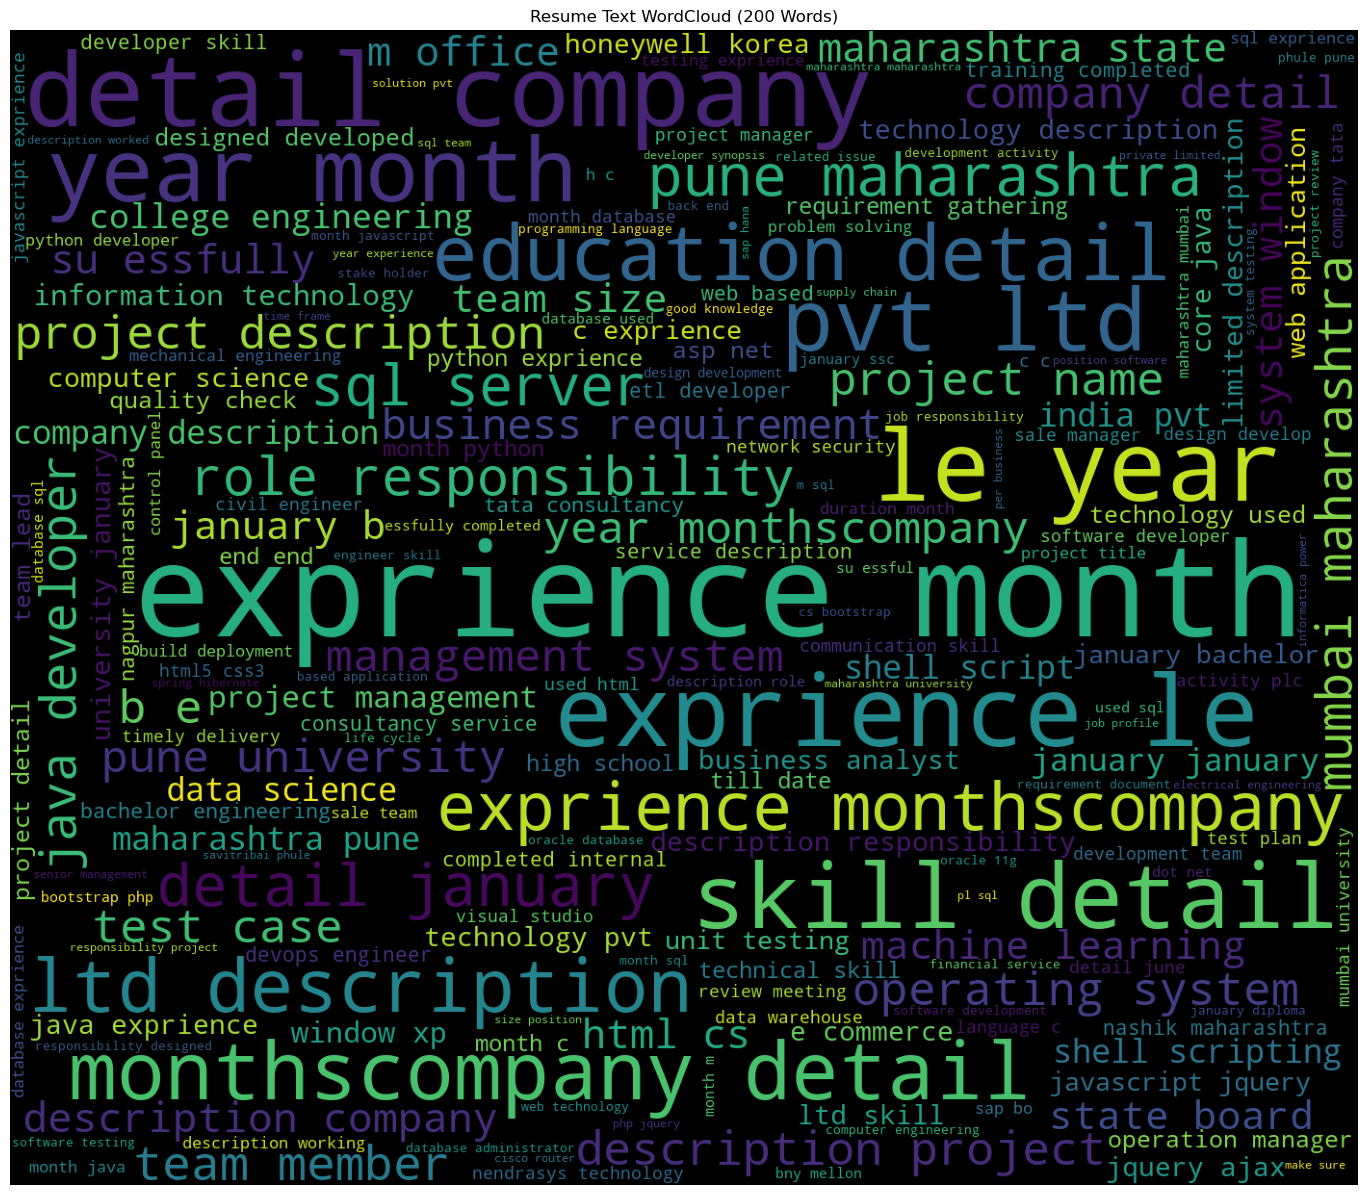

In [37]:
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()

In [38]:
# Catagory_Analysis

In [71]:
data= resume[resume["Category"]=="Data Science"]

In [72]:
len(data)

39

In [73]:
data["clean"]

1     Education Details May 2013 to May 2017 B E UIT...
2     Areas of Interest Deep Learning Control System...
3     Skills R Python SAP HANA Tableau SAP HANA SQL ...
4     Education Details MCA YMCAUST Faridabad Haryan...
5     SKILLS C Basics IOT Python MATLAB Data Science...
6     Skills Python Tableau Data Visualization R Stu...
7     Education Details B Tech Rayat and Bahra Insti...
8     Personal Skills Ability to quickly grasp techn...
9     Expertise Data and Quantitative Analysis Decis...
10    Skills Programming Languages Python pandas num...
11    Education Details May 2013 to May 2017 B E UIT...
12    Areas of Interest Deep Learning Control System...
13    Skills R Python SAP HANA Tableau SAP HANA SQL ...
14    Education Details MCA YMCAUST Faridabad Haryan...
15    SKILLS C Basics IOT Python MATLAB Data Science...
16    Skills Python Tableau Data Visualization R Stu...
17    Education Details B Tech Rayat and Bahra Insti...
18    Personal Skills Ability to quickly grasp t

In [74]:
data_corpus=" "

for index, row in data.iterrows():
    data_corpus+=row['clean']

In [75]:
data_corpus

' Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github c

In [76]:
data_corpus=data_corpus.lower()

In [77]:
Words_Science=data_corpus.split()

In [78]:
print('Frequency of"python"is: ',Words_Science.count("python"))

Frequency of"python"is:  170


In [79]:
print('Frequency of "sap"  is :', Words_Science.count("sap"))

Frequency of "sap"  is : 68


In [80]:
print('Frequency of "analysis"  is :', Words_Science.count("analysis"))

Frequency of "analysis"  is : 76


In [81]:
print('Frequency of "sql"  is :', Words_Science.count("sql"))

Frequency of "sql"  is : 71


In [82]:
print('Frequency of "neural"  is :', Words_Science.count("neural"))

Frequency of "neural"  is : 47


In [83]:
print('Frequency of "network"  is :', Words_Science.count("network"))

Frequency of "network"  is : 12


In [84]:
print('Frequency of "networks"  is :', Words_Science.count("networks"))

Frequency of "networks"  is : 20


In [85]:
print('Frequency of "pandas"  is :', Words_Science.count("pandas"))

Frequency of "pandas"  is : 23


In [86]:
print('Frequency of "r"  is :', Words_Science.count("r"))

Frequency of "r"  is : 36


In [87]:
print('Frequency of "excel"  is :', Words_Science.count("excel"))

Frequency of "excel"  is : 12


In [88]:
print('Frequency of "anaconda"  is :', Words_Science.count("anaconda"))

Frequency of "anaconda"  is : 4


In [89]:
print('Frequency of "jupyter"  is :', Words_Science.count("jupyter"))

Frequency of "jupyter"  is : 4


In [90]:
print('Frequency of "education"  is :', Words_Science.count("education"))

Frequency of "education"  is : 48


In [91]:
print('Frequency of "experience"  is :', Words_Science.count("experience"))

Frequency of "experience"  is : 52
